#### C1 - Use ‘Expressions’ folder to detect the expressions in images contained in ‘FacesSample’ folder.

In [1]:
import numpy as np
import pandas as pd
import cv2 as cv
import matplotlib.pylab as plt
from PIL import Image
import imageio.v2 as imageio
from skimage import color
from skimage.feature import match_template
import os

In [2]:
def resize_image(img, target_size):
    return cv.resize(img, target_size)

In [3]:
common_template_size = (100, 100)  # Adjust the size as needed

In [4]:
# Load expression templates (you need to create these)
expressions = {
    'Surprised': resize_image(cv.imread('Expressions/Surprised.jpeg', cv.IMREAD_GRAYSCALE), common_template_size),
    'Angry': resize_image(cv.imread('Expressions/Angry.jpeg', cv.IMREAD_GRAYSCALE), common_template_size),
    'Happy': resize_image(cv.imread('Expressions/Happy.jpeg', cv.IMREAD_GRAYSCALE), common_template_size),
    'Sad': resize_image(cv.imread('Expressions/Sad.jpeg', cv.IMREAD_GRAYSCALE), common_template_size),
    'Frightful': resize_image(cv.imread('Expressions/Frightful.jpeg', cv.IMREAD_GRAYSCALE), common_template_size),
    'Neutral': resize_image(cv.imread('Expressions/Neutral.jpeg', cv.IMREAD_GRAYSCALE), common_template_size)
}

In [5]:
# Process face samples
facesamples = 'FacesSample'
results = []

Displaying both face sample and detected expression

Image: fig124.jpg, Detected: Sad, Confidence: 0.365


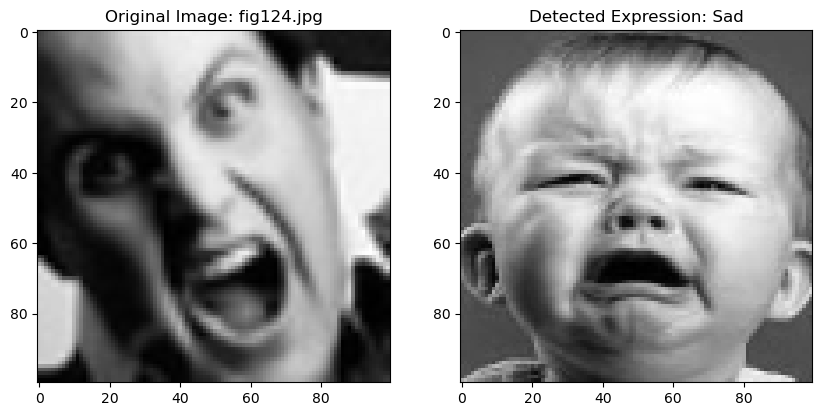

Image: fig534.jpg, Detected: Angry, Confidence: 0.172


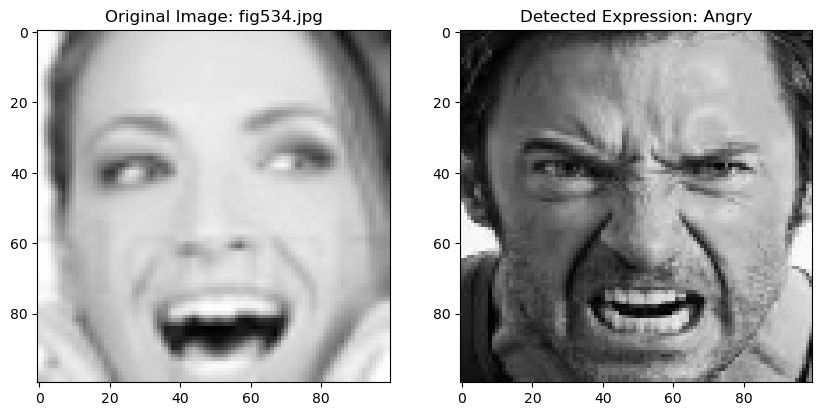

Image: fig535.jpg, Detected: Angry, Confidence: 0.417


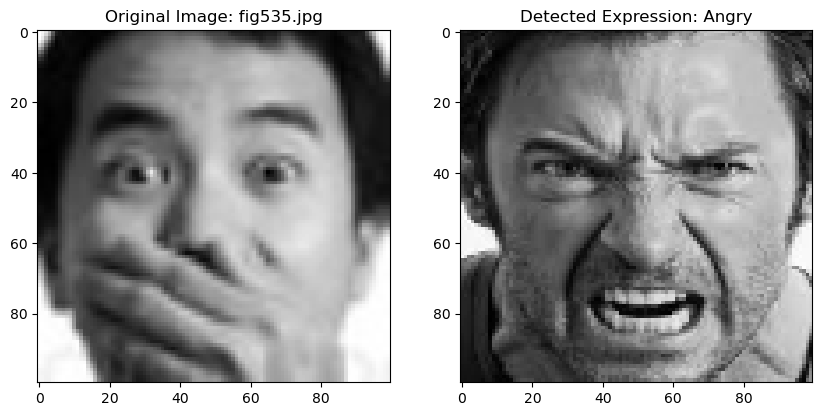

Image: fig119.jpg, Detected: Happy, Confidence: 0.184


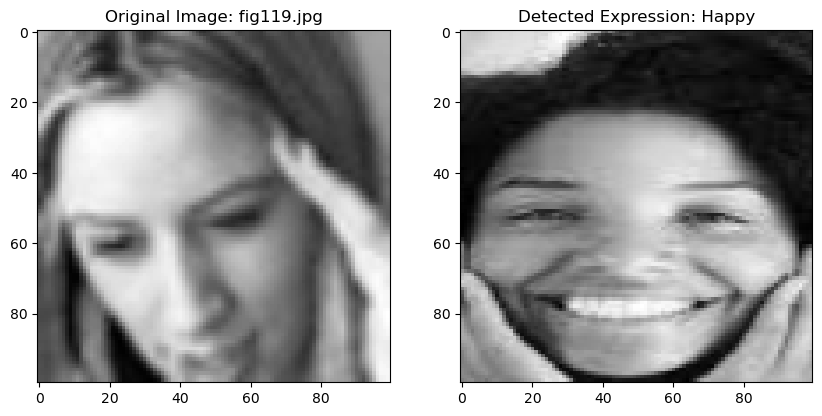

Image: fig17.jpg, Detected: Frightful, Confidence: 0.291


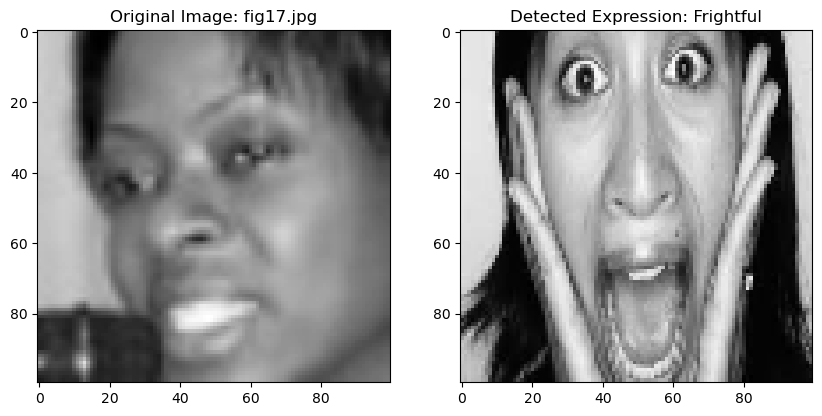

Image: fig5.jpg, Detected: Surprised, Confidence: 0.138


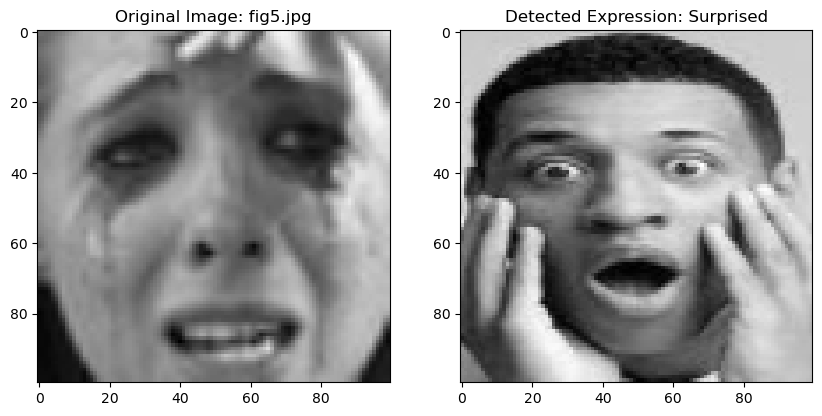

Image: fig3166.jpg, Detected: Angry, Confidence: 0.510


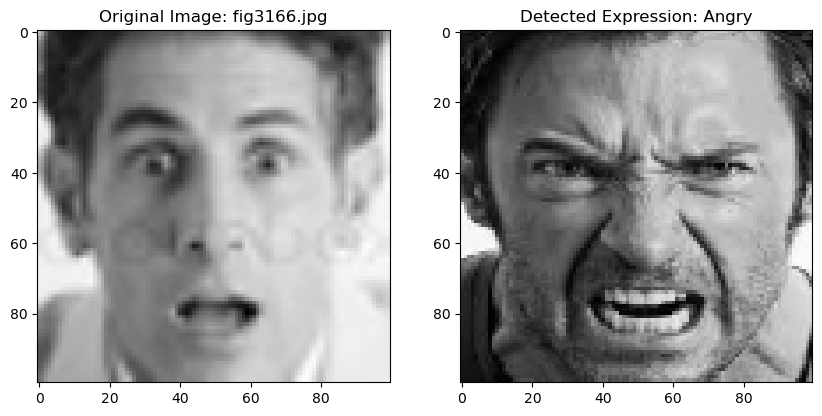

Image: fig1573.jpg, Detected: Happy, Confidence: 0.128


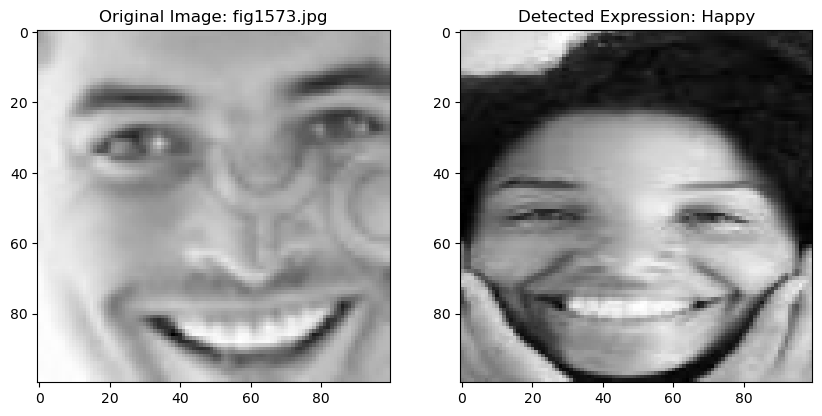

Image: fig123.jpg, Detected: Happy, Confidence: 0.254


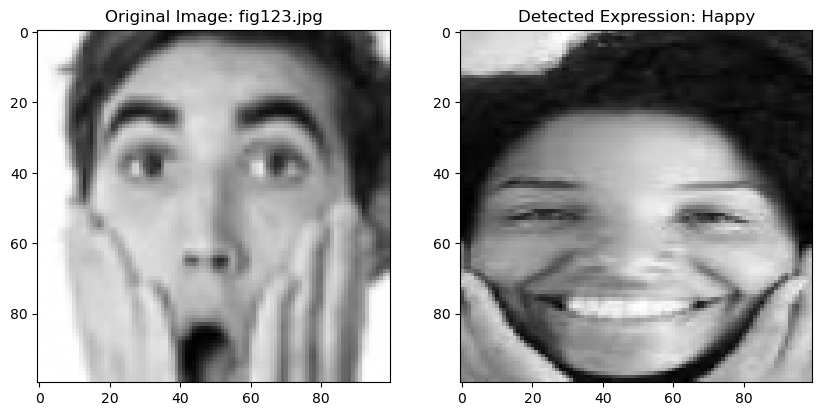

Image: fig121.jpg, Detected: Frightful, Confidence: 0.161


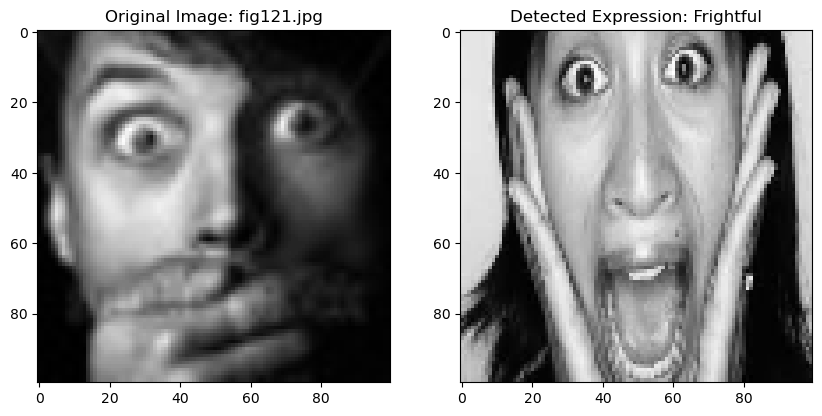

Image: fig109.jpg, Detected: Happy, Confidence: 0.374


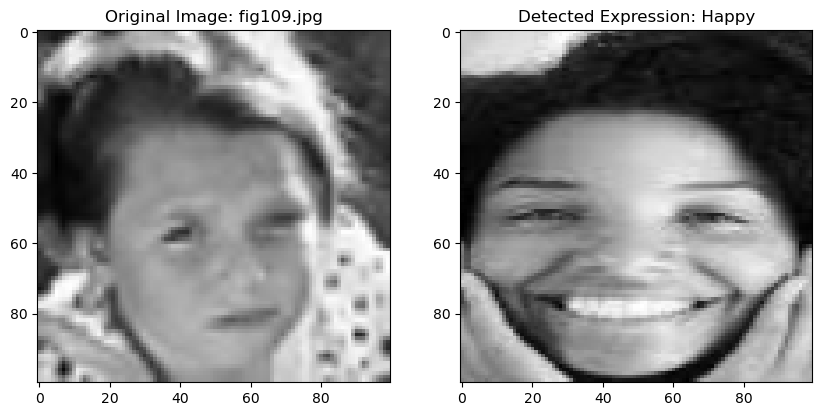

Image: fig336.jpg, Detected: Happy, Confidence: 0.114


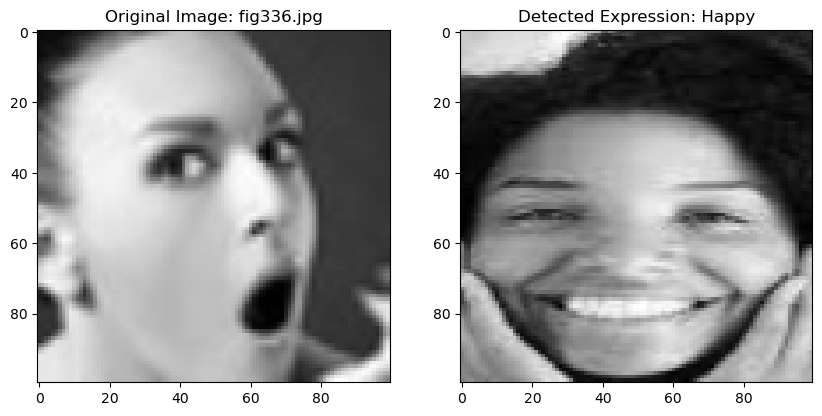

Image: fig108.jpg, Detected: Angry, Confidence: 0.502


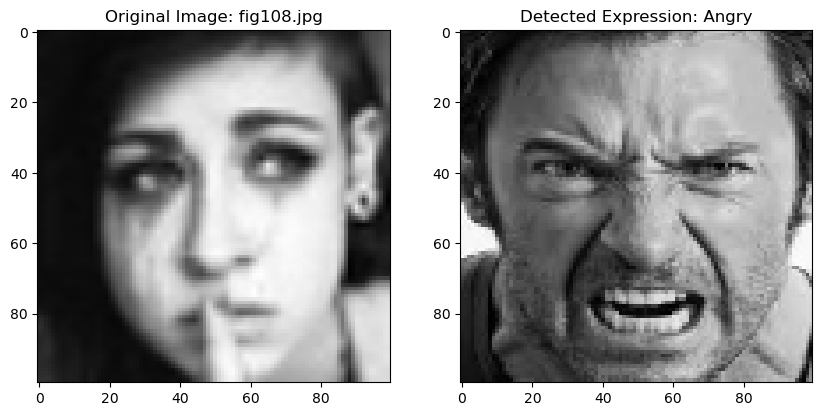

Image: fig120.jpg, Detected: Sad, Confidence: 0.165


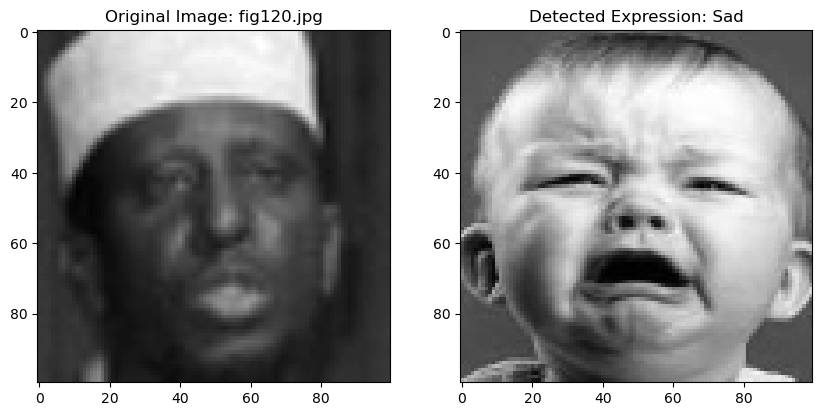

Image: fig144.jpg, Detected: Sad, Confidence: 0.176


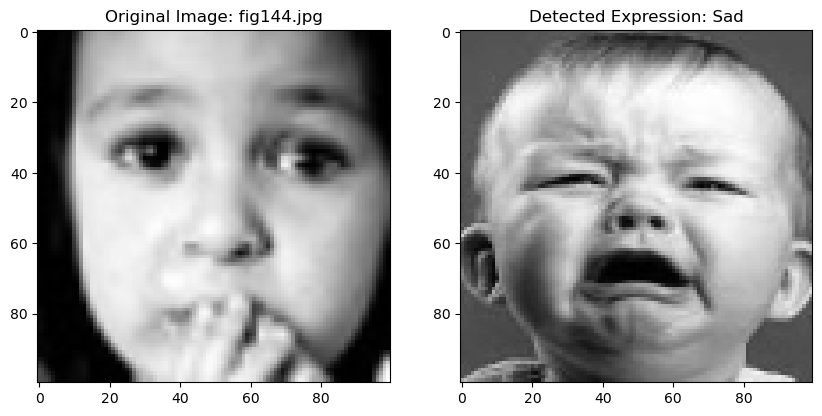

Image: fig150.jpg, Detected: Happy, Confidence: 0.342


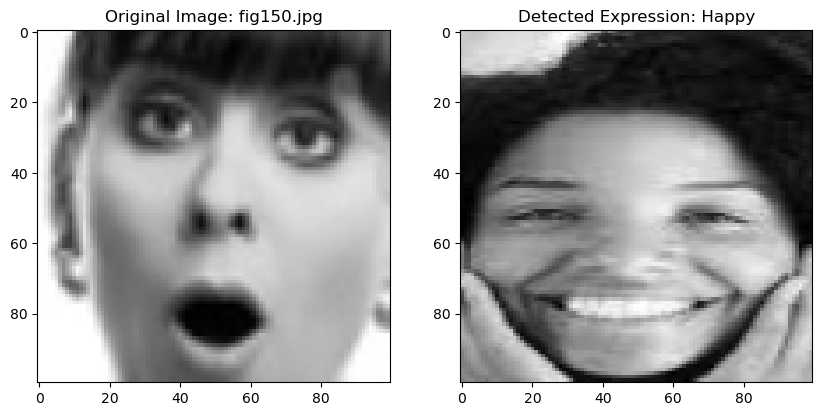

Image: fig597.jpg, Detected: Sad, Confidence: 0.387


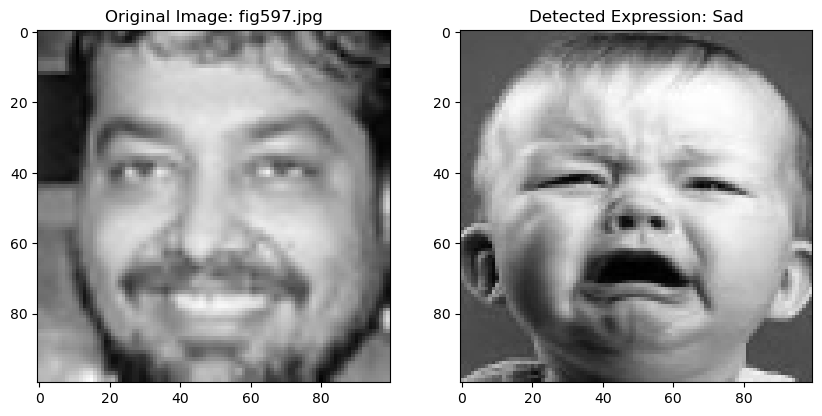

Image: fig48.jpg, Detected: Angry, Confidence: 0.398


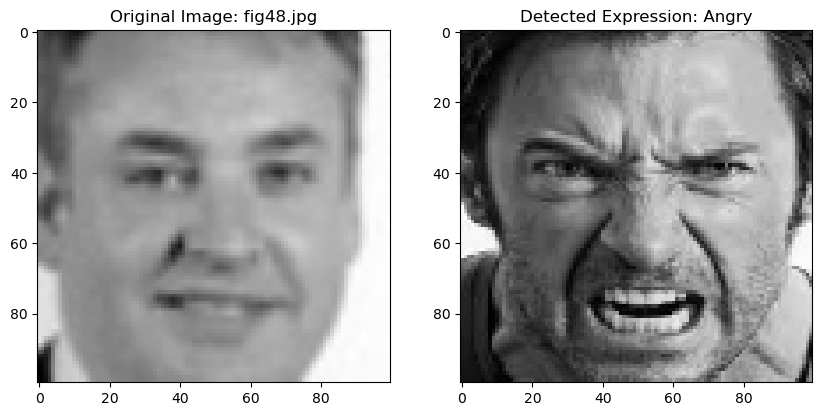

Image: fig145.jpg, Detected: Angry, Confidence: 0.172


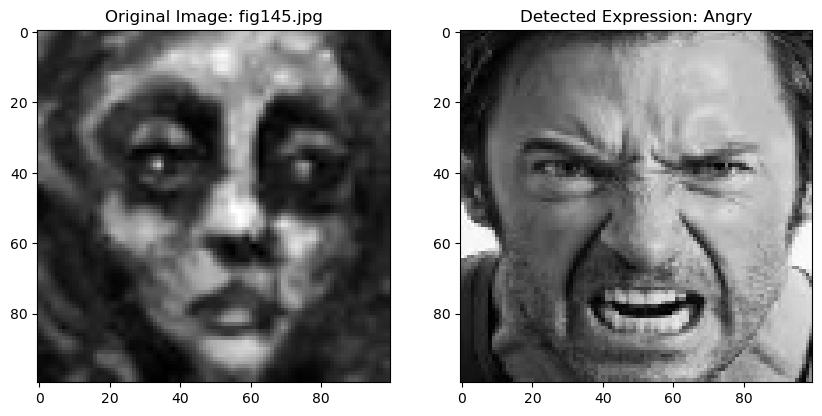

Image: fig949.jpg, Detected: Frightful, Confidence: 0.326


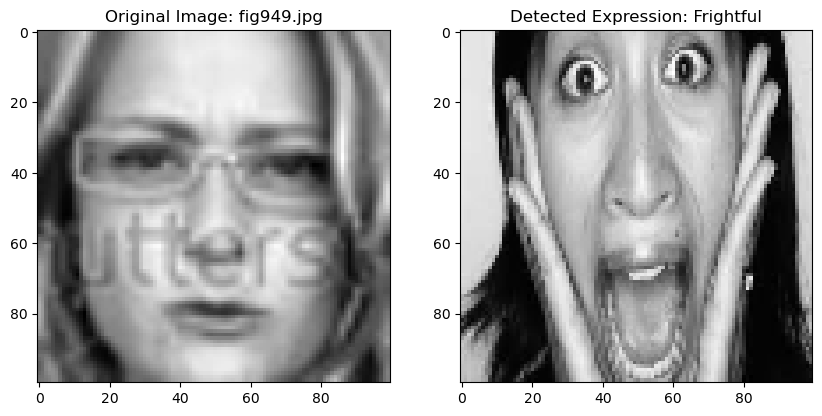

Image: fig70.jpg, Detected: Angry, Confidence: 0.125


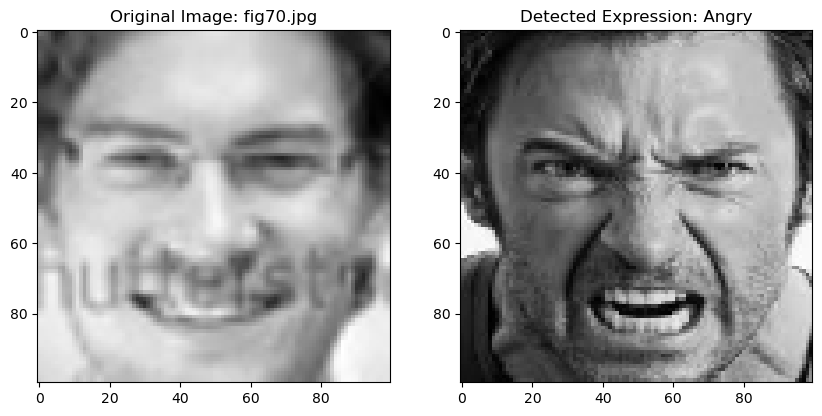

Image: fig6292.jpg, Detected: Surprised, Confidence: 0.226


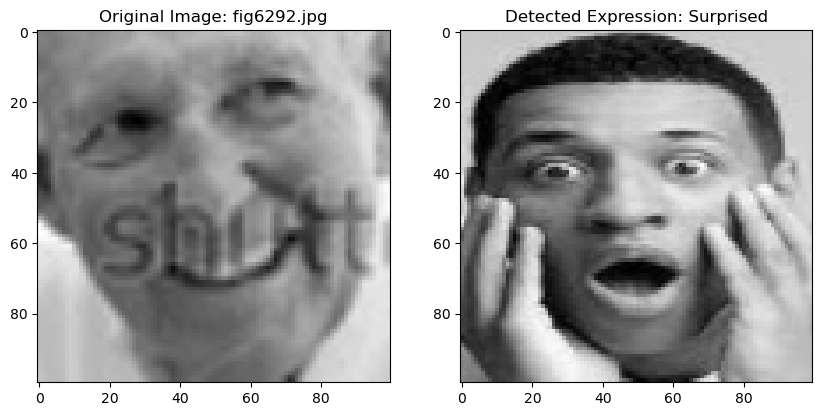

Image: fig172.jpg, Detected: Frightful, Confidence: 0.030


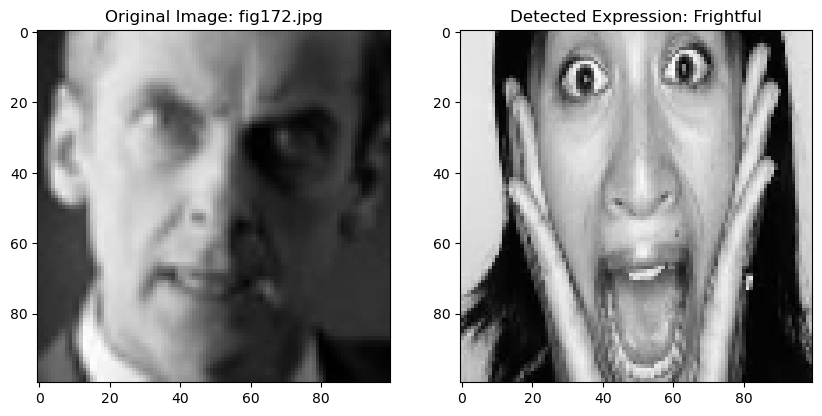

Image: fig358.jpg, Detected: Frightful, Confidence: 0.053


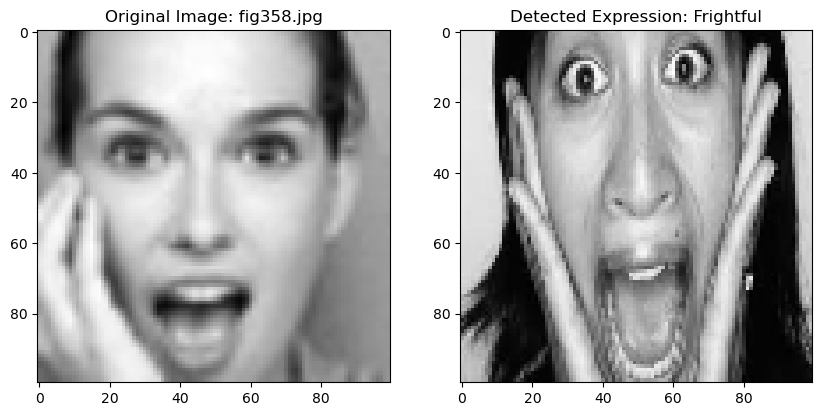

Image: fig42.jpg, Detected: Frightful, Confidence: 0.163


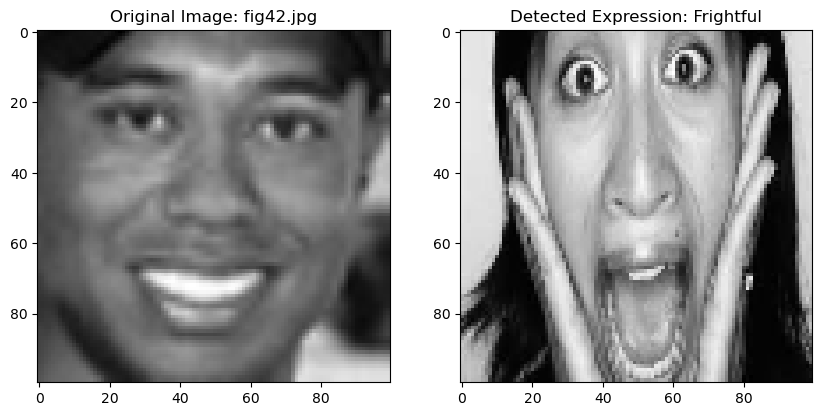

Image: fig947.jpg, Detected: Neutral, Confidence: 0.168


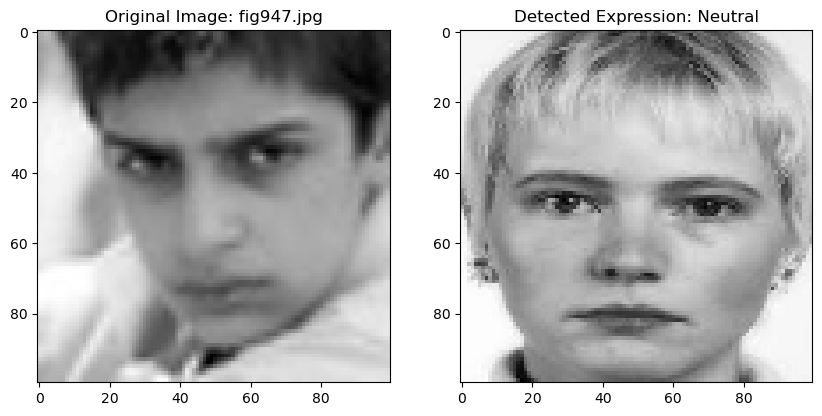

Image: fig952.jpg, Detected: Surprised, Confidence: 0.171


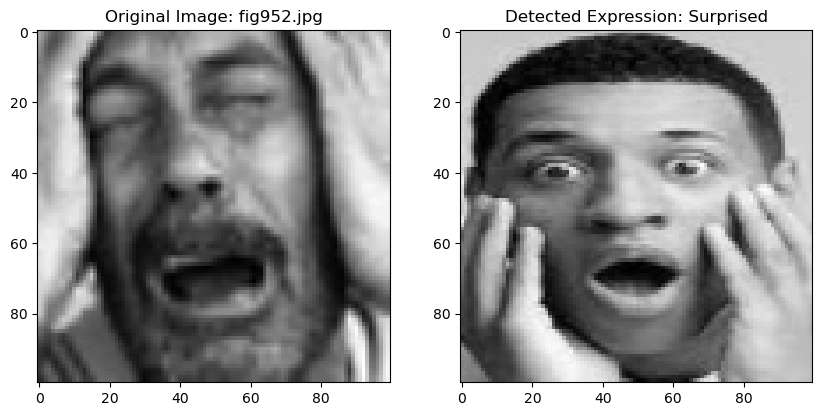

Image: fig946.jpg, Detected: Happy, Confidence: 0.122


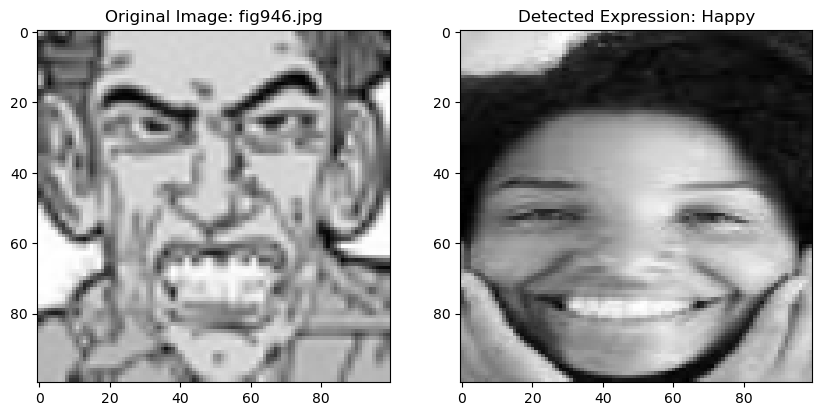

Image: fig43.jpg, Detected: Angry, Confidence: 0.599


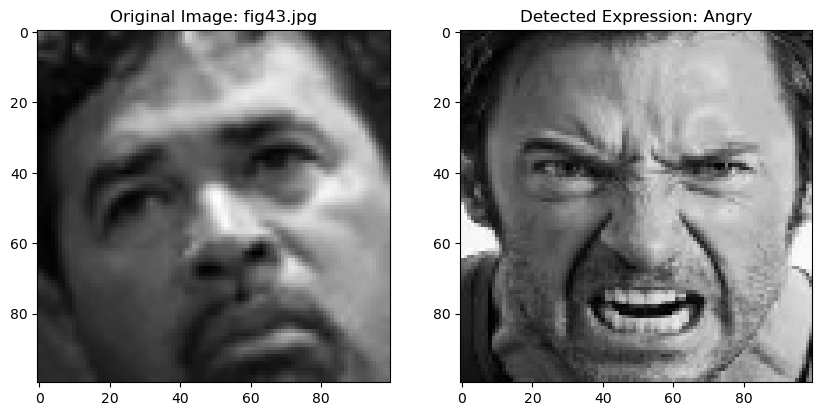

Image: fig359.jpg, Detected: Frightful, Confidence: 0.172


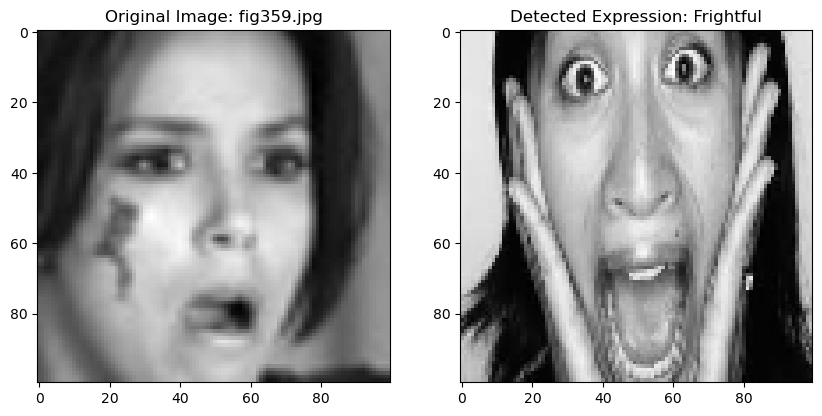

Image: fig69.jpg, Detected: Neutral, Confidence: 0.351


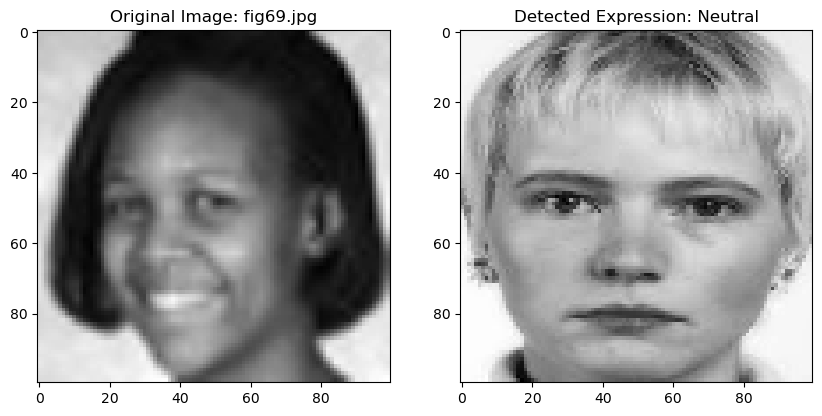

Image: fig55.jpg, Detected: Neutral, Confidence: 0.233


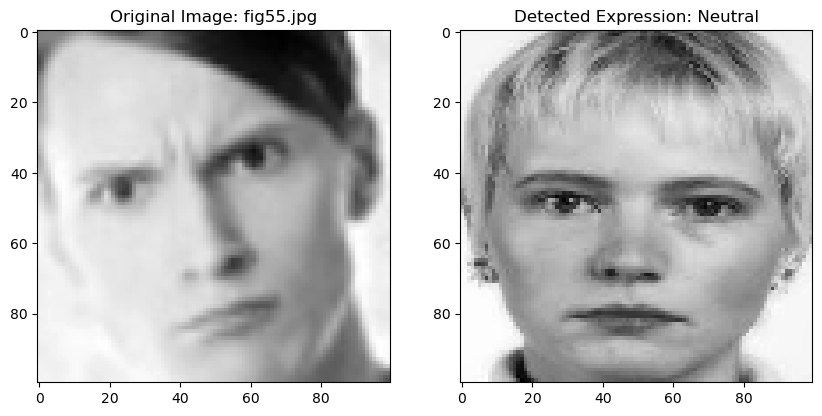

Image: fig950.jpg, Detected: Angry, Confidence: 0.223


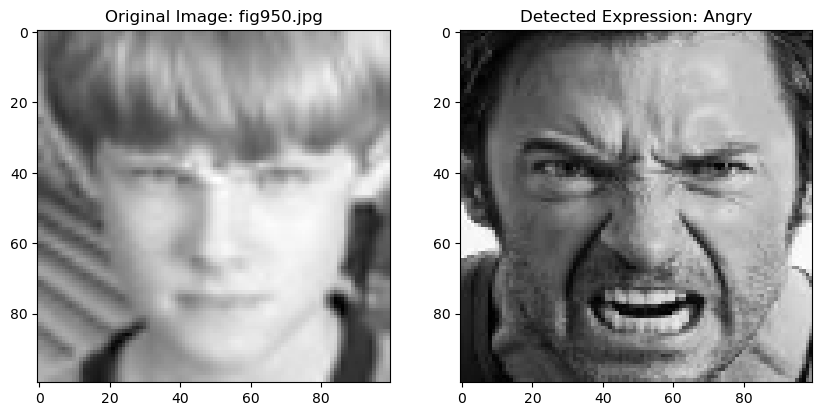

Image: fig944.jpg, Detected: Frightful, Confidence: 0.000


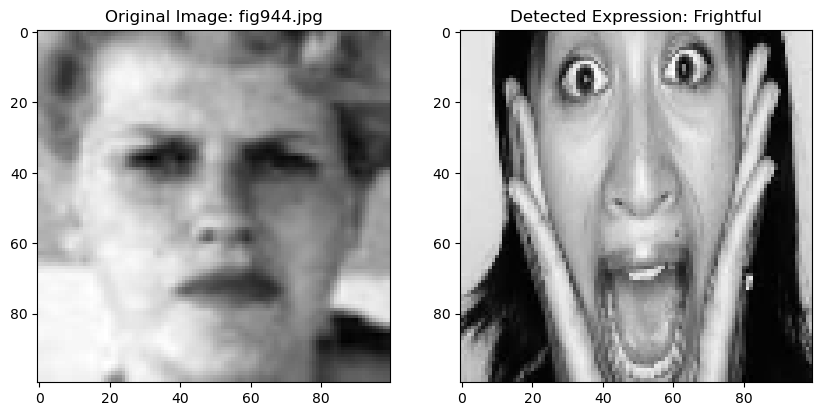

Image: fig945.jpg, Detected: Sad, Confidence: 0.498


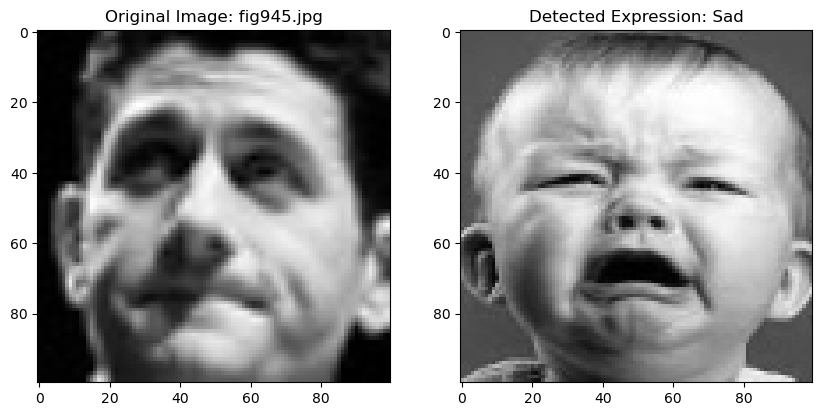

Image: fig68.jpg, Detected: Neutral, Confidence: 0.351


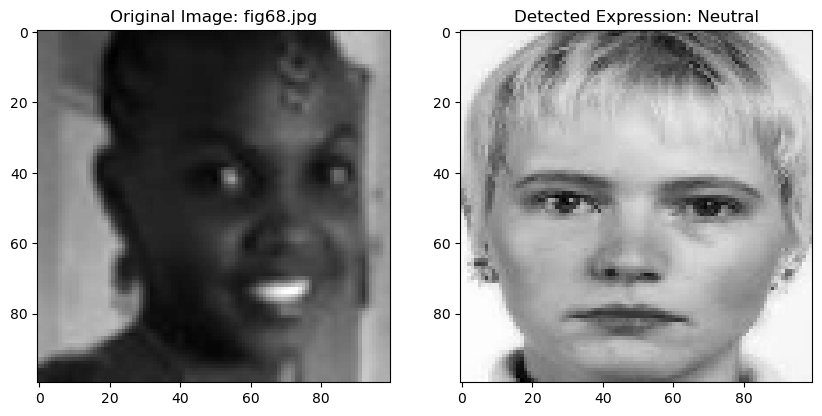

Image: fig1531.jpg, Detected: Frightful, Confidence: 0.251


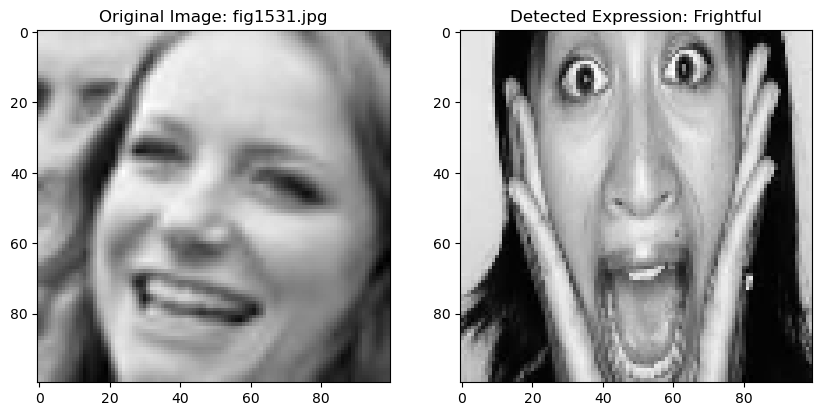

Image: fig87.jpg, Detected: Sad, Confidence: 0.145


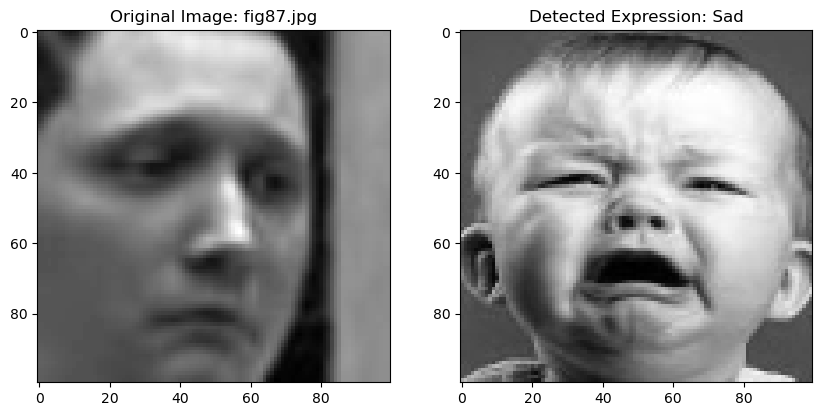

Image: fig51.jpg, Detected: Sad, Confidence: 0.189


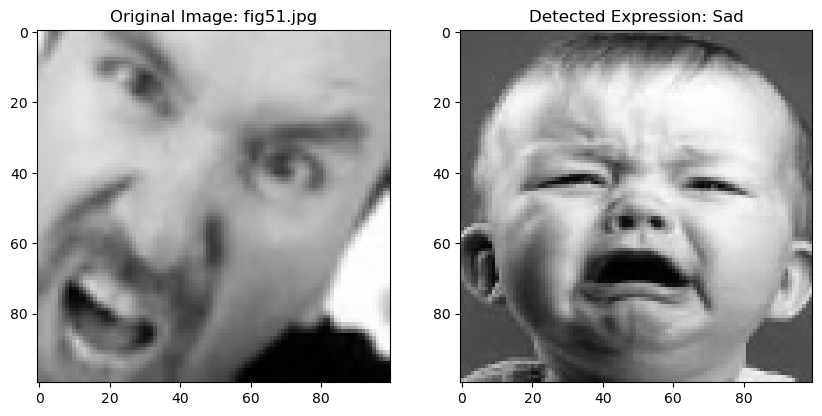

Image: fig86.jpg, Detected: Frightful, Confidence: 0.323


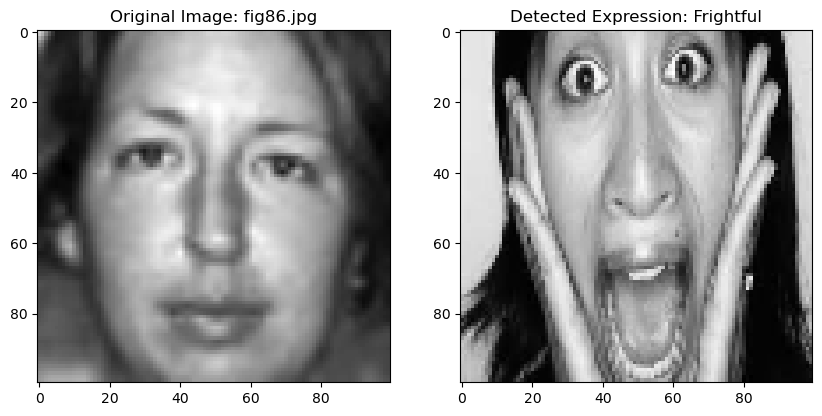

Image: fig47.jpg, Detected: Happy, Confidence: 0.241


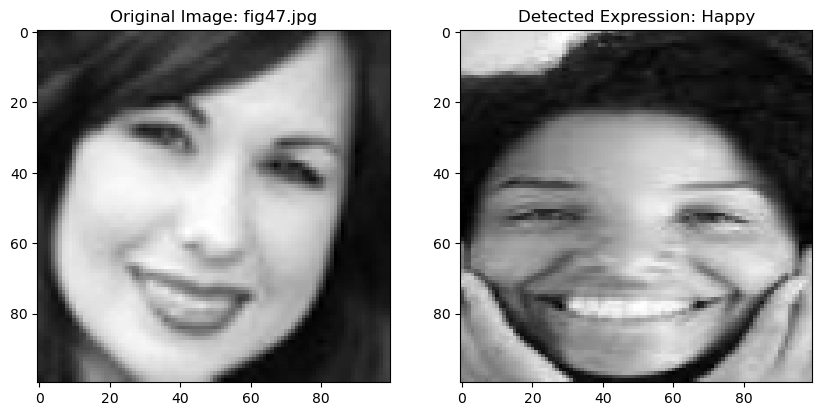

Image: fig942.jpg, Detected: Frightful, Confidence: 0.058


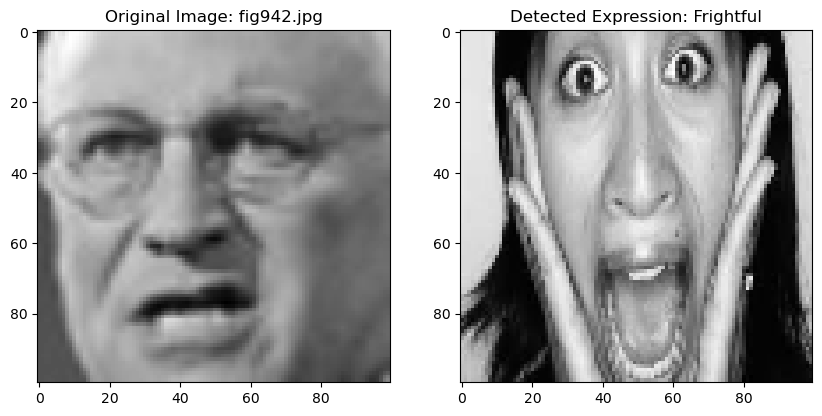

Image: fig957.jpg, Detected: Angry, Confidence: 0.255


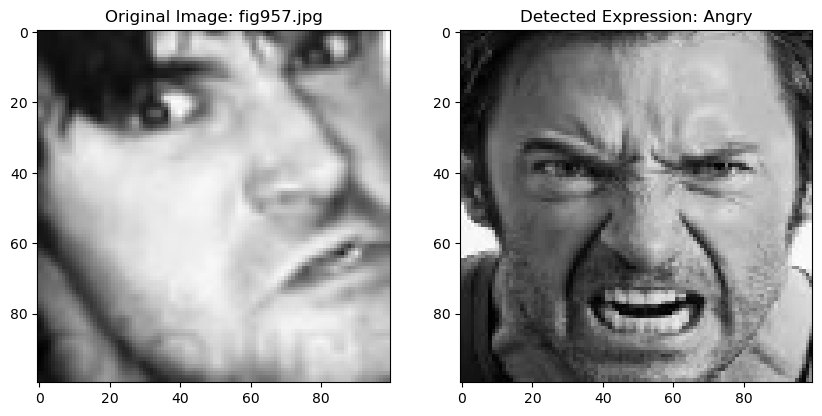

Image: fig46.jpg, Detected: Sad, Confidence: 0.238


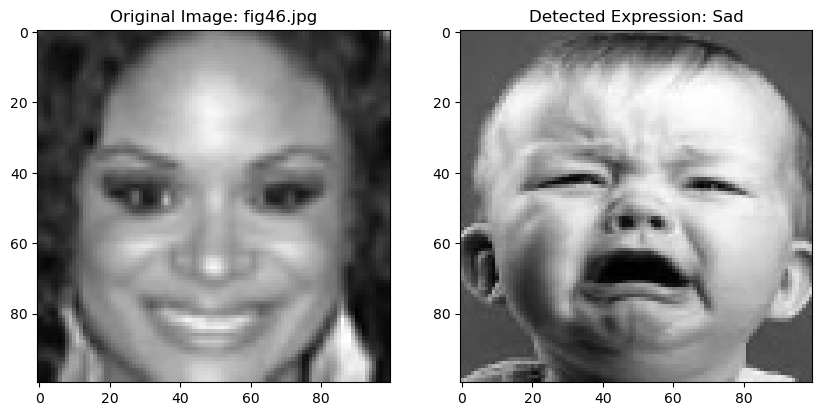

Image: fig85.jpg, Detected: Frightful, Confidence: 0.191


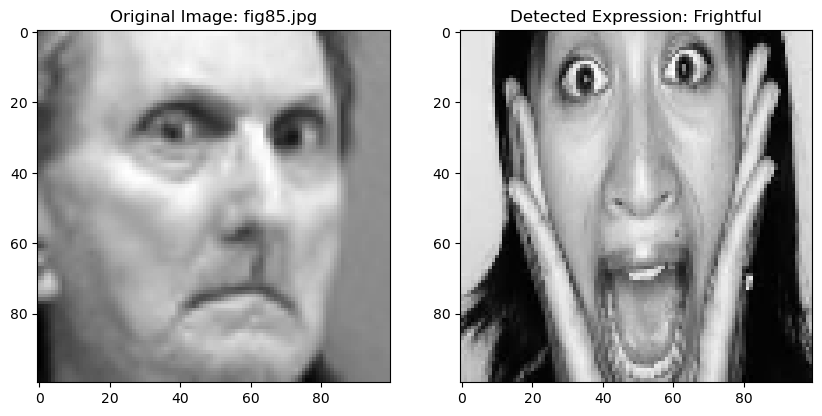

Image: fig837.jpg, Detected: Angry, Confidence: 0.396


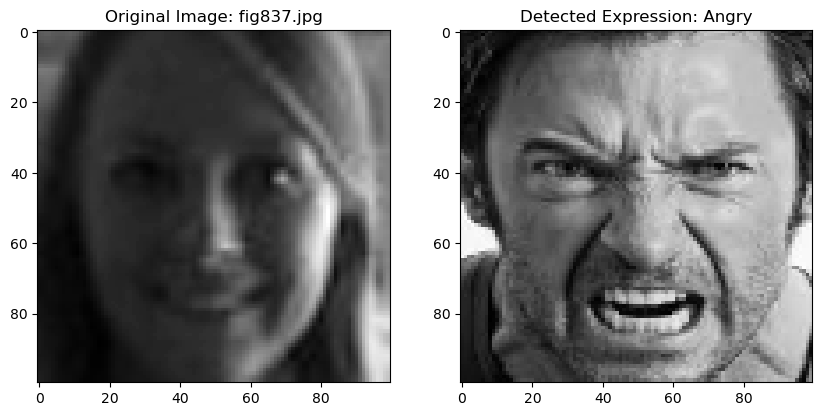

Image: fig110.jpg, Detected: Angry, Confidence: 0.467


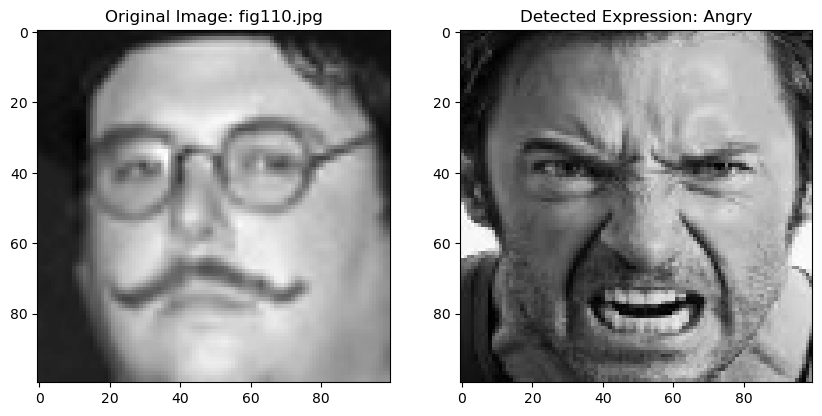

Image: fig489.jpg, Detected: Frightful, Confidence: 0.142


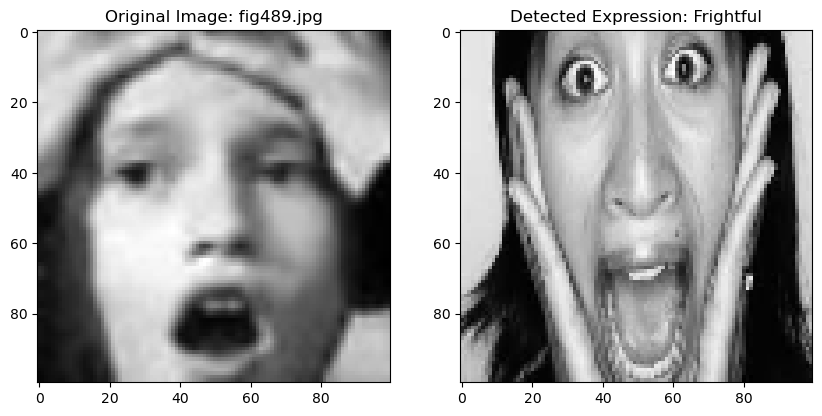

Image: fig23.jpg, Detected: Frightful, Confidence: 0.221


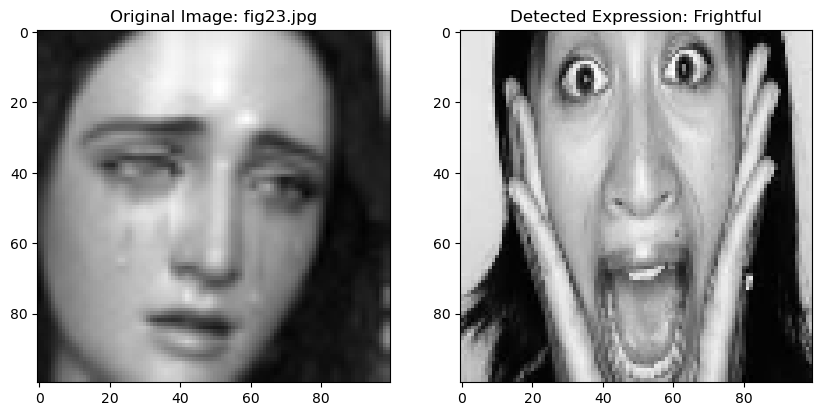

Image: fig512.jpg, Detected: Happy, Confidence: 0.041


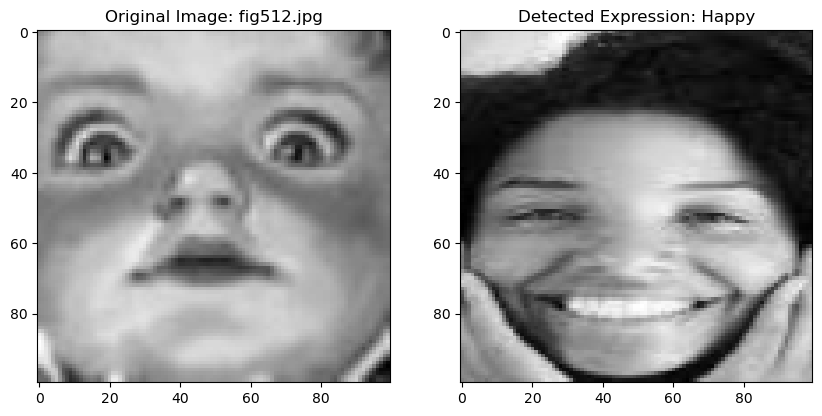

Image: fig1596.jpg, Detected: Happy, Confidence: 0.426


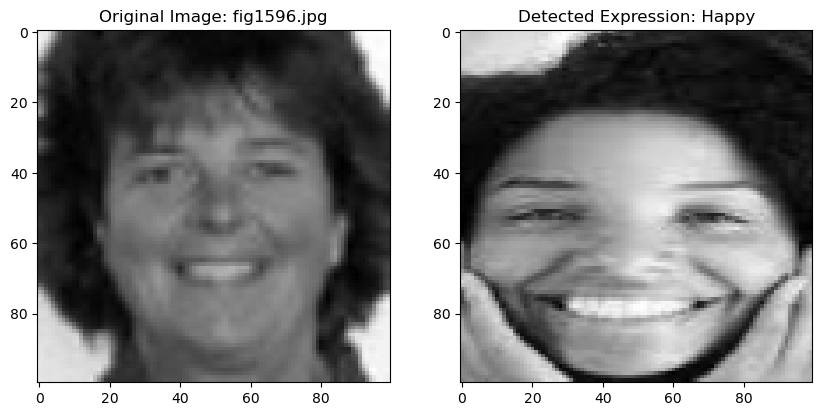

Image: fig511.jpg, Detected: Neutral, Confidence: 0.153


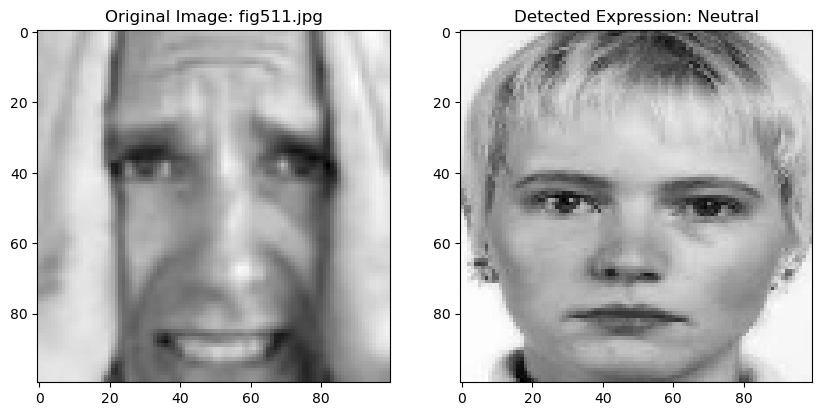

In [6]:
for filename in os.listdir(facesamples):
    if filename.endswith('.jpg'):
        # Load and resize image
        img_path = os.path.join(facesamples, filename)
        test_image = resize_image(cv.imread(img_path, cv.IMREAD_GRAYSCALE), common_template_size)
        
        best_match_score = 0
        detected_expression = None
        
        # Test against each expression template
        for expression_name, template in expressions.items():
            correlation = match_template(test_image, template)
            match_score = np.max(correlation)
            
            if match_score > best_match_score:
                best_match_score = match_score
                detected_expression = expression_name
        
        results.append({
            'filename': filename,
            'detected_expression': detected_expression,
            'confidence': best_match_score
        })
        
        print(f"Image: {filename}, Detected: {detected_expression}, Confidence: {best_match_score:.3f}")

        # Display the original image and the detected expression
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

        ax1.imshow(test_image, cmap='gray')  # Changed from 'original_image' to 'test_image'
        ax1.set_title(f"Original Image: {filename}")

        ax2.imshow(expressions[detected_expression], cmap='gray')  # Changed from 'best_expression' to 'detected_expression'
        ax2.set_title(f"Detected Expression: {detected_expression}")

        plt.show()


In [7]:
# Analysis of detection accuracy
print(f"\nTotal images processed: {len(results)}")
expression_counts = {}
for result in results:
    expr = result['detected_expression']
    expression_counts[expr] = expression_counts.get(expr, 0) + 1

print("Expression distribution:")
for expr, count in expression_counts.items():
    print(f"{expr}: {count} images")


Total images processed: 52
Expression distribution:
Sad: 8 images
Angry: 12 images
Happy: 10 images
Frightful: 14 images
Surprised: 3 images
Neutral: 5 images


Displaying just the results

In [8]:
# Display results
for result in results:
    print(f"Image: {result['filename']}, Detected Expression: {result['detected_expression']}")

Image: fig124.jpg, Detected Expression: Sad
Image: fig534.jpg, Detected Expression: Angry
Image: fig535.jpg, Detected Expression: Angry
Image: fig119.jpg, Detected Expression: Happy
Image: fig17.jpg, Detected Expression: Frightful
Image: fig5.jpg, Detected Expression: Surprised
Image: fig3166.jpg, Detected Expression: Angry
Image: fig1573.jpg, Detected Expression: Happy
Image: fig123.jpg, Detected Expression: Happy
Image: fig121.jpg, Detected Expression: Frightful
Image: fig109.jpg, Detected Expression: Happy
Image: fig336.jpg, Detected Expression: Happy
Image: fig108.jpg, Detected Expression: Angry
Image: fig120.jpg, Detected Expression: Sad
Image: fig144.jpg, Detected Expression: Sad
Image: fig150.jpg, Detected Expression: Happy
Image: fig597.jpg, Detected Expression: Sad
Image: fig48.jpg, Detected Expression: Angry
Image: fig145.jpg, Detected Expression: Angry
Image: fig949.jpg, Detected Expression: Frightful
Image: fig70.jpg, Detected Expression: Angry
Image: fig6292.jpg, Detected 

In [9]:
# Save results to CSV for further analysis
# labeled_data.to_csv('expression_detection_results.csv', index=False)

#### C2 - Extend C1 by labelling the outputs and creating a mood chart of the images.

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# Create mood chart
plt.figure(figsize=(12, 8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Sad'),
  Text(1, 0, 'Angry'),
  Text(2, 0, 'Happy'),
  Text(3, 0, 'Frightful'),
  Text(4, 0, 'Surprised'),
  Text(5, 0, 'Neutral')])

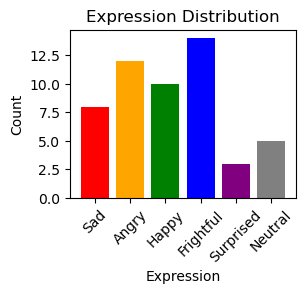

In [12]:
# Bar chart of expression counts
plt.subplot(2, 2, 1)
plt.bar(expression_counts.keys(), expression_counts.values(), color=['red', 'orange', 'green', 'blue', 'purple', 'gray'])
plt.title('Expression Distribution')
plt.xlabel('Expression')
plt.ylabel('Count')
plt.xticks(rotation=45)

Text(0.5, 1.0, 'Expression Proportions')

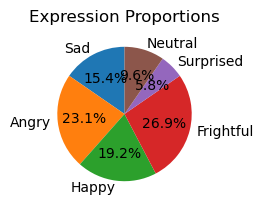

In [13]:
# Pie chart of expressions
plt.subplot(2, 2, 3)
plt.pie(expression_counts.values(), labels=expression_counts.keys(), autopct='%1.1f%%', startangle=90)
plt.title('Expression Proportions')

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Sad'),
  Text(1, 0, 'Angry'),
  Text(2, 0, 'Happy'),
  Text(3, 0, 'Frightful'),
  Text(4, 0, 'Surprised'),
  Text(5, 0, 'Neutral')])

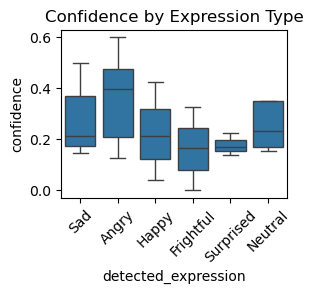

In [14]:
# Create a labeled dataset
labeled_data = pd.DataFrame(results)
plt.subplot(2, 2, 4)
sns.boxplot(data=labeled_data, x='detected_expression', y='confidence')
plt.title('Confidence by Expression Type')
plt.xticks(rotation=45)

In [15]:
common_template_size = (100, 100)  # Adjust the size as needed
surprised_original = resize_image(cv.imread('Expressions/Surprised.jpeg'), common_template_size)
angry_original = resize_image(cv.imread('Expressions/Angry.jpeg'), common_template_size)
happy_original = resize_image(cv.imread('Expressions/Happy.jpeg'), common_template_size)
sad_original = resize_image(cv.imread('Expressions/Sad.jpeg'), common_template_size)
frightful_original = resize_image(cv.imread('Expressions/Frightful.jpeg'), common_template_size)
neutral_original = resize_image(cv.imread('Expressions/Neutral.jpeg'), common_template_size)

In [16]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

### Real-life Application Extension

In [17]:
# Real-life application: Employee Wellness Monitoring System

class EmployeeWellnessMonitor:
    def __init__(self):
        self.daily_mood_data = []
        self.alert_threshold = 0.3  # 30% negative emotions triggers alert
    
    def analyze_workplace_mood(self, detection_results):
        """Analyze mood patterns for workplace wellness"""
        negative_emotions = ['Angry', 'Sad', 'Frightful']
        positive_emotions = ['Happy', 'Surprised']
        neutral_emotions = ['Neutral']
        
        total_detections = len(detection_results)
        negative_count = sum(1 for r in detection_results if r['detected_expression'] in negative_emotions)
        positive_count = sum(1 for r in detection_results if r['detected_expression'] in positive_emotions)
        neutral_count = sum(1 for r in detection_results if r['detected_expression'] in neutral_emotions)
        
        negative_ratio = negative_count / total_detections if total_detections > 0 else 0
        positive_ratio = positive_count / total_detections if total_detections > 0 else 0
        
        wellness_score = (positive_ratio * 1.0) + (neutral_count / total_detections * 0.5) - (negative_ratio * 0.5)
        
        return {
            'wellness_score': wellness_score,
            'negative_ratio': negative_ratio,
            'positive_ratio': positive_ratio,
            'alert_needed': negative_ratio > self.alert_threshold
        }
    
    def generate_wellness_report(self, analysis):
        """Generate wellness recommendations"""
        if analysis['alert_needed']:
            recommendations = [
                "Consider implementing stress reduction workshops",
                "Increase team building activities", 
                "Provide mental health resources",
                "Review workload distribution"
            ]
        else:
            recommendations = [
                "Current workplace mood is healthy",
                "Continue current wellness initiatives",
                "Monitor for any changes in patterns"
            ]
        
        return recommendations

In [18]:
# Apply to current data
wellness_monitor = EmployeeWellnessMonitor()
mood_analysis = wellness_monitor.analyze_workplace_mood(results)
recommendations = wellness_monitor.generate_wellness_report(mood_analysis)

In [19]:
print("Workplace Wellness Analysis:")
print(f"Wellness Score: {mood_analysis['wellness_score']:.3f}")
print(f"Negative Emotion Ratio: {mood_analysis['negative_ratio']:.3f}")
print(f"Alert Needed: {mood_analysis['alert_needed']}")
print("\nRecommendations:")
for rec in recommendations:
    print(f"- {rec}")

Workplace Wellness Analysis:
Wellness Score: -0.029
Negative Emotion Ratio: 0.654
Alert Needed: True

Recommendations:
- Consider implementing stress reduction workshops
- Increase team building activities
- Provide mental health resources
- Review workload distribution
